## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

We were motivated to choose cancer research because we wanted to do a project on code that may really help people. Through our findings, we may have the opportunity to unravel complex patterns between characteristics of a tumor that may give cancer patients peace of mind if the tumor is malignant or benign. 


## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

It may be difficult to classify tumor types without complex and invasive tests. We want to be able to accurately classify tumors as malignant or not based on surface level medical observations like length, mass and texture with a low rate of false negatives.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

We used a dataset from cancer. Here is the link: https://www.kaggle.com/datasets/erdemtaha/cancer-data. 

There are 569 rows of data and 32 total columns, but we dropped the response column and the "id" column, so we used 30 total predictors. There were no nulls in the data, and the only categorical column was our response variable, so we converted Malignant to 1 and Benign to 0. The predictors were all numerical data about the tumor itself. All our predictors have either _se, _worst, or _mean. _se represents standard error, _worst represents the highest value of  the tumor for that measurement, and _mean represents the mean value. For example, we have two predictors radius_se and radius_worst. Radius_se represents the estimated standard error for the radius of the tumor, and radius_wrost represents the highest value of the tumor radius range that was taken. 

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

The stakeholders are medical professionals and people who are affected by cancer. This would benefit them because it would give the stakeholders a clearer idea of if a tumor is likely to be malignant without invasive tests. While more complete tests are likely to follow, an understanding of liklihood patterns will help professionals to better prioritize medical resources based on tumor characteristics.


## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


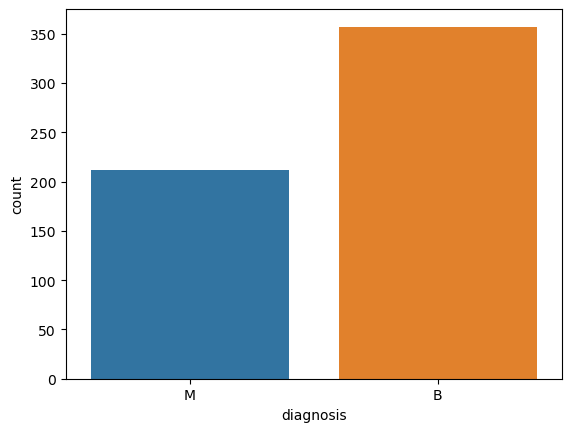

In [3]:
#| echo: false
import pandas as pd
import seaborn as sns
data = pd.read_csv("Cancer_Data.csv")
sns.countplot(x="diagnosis", data = data)

# Calculate value counts
value_counts = data['diagnosis'].value_counts()

# Calculate proportions
proportions = value_counts / len(data['diagnosis'])
print(proportions)

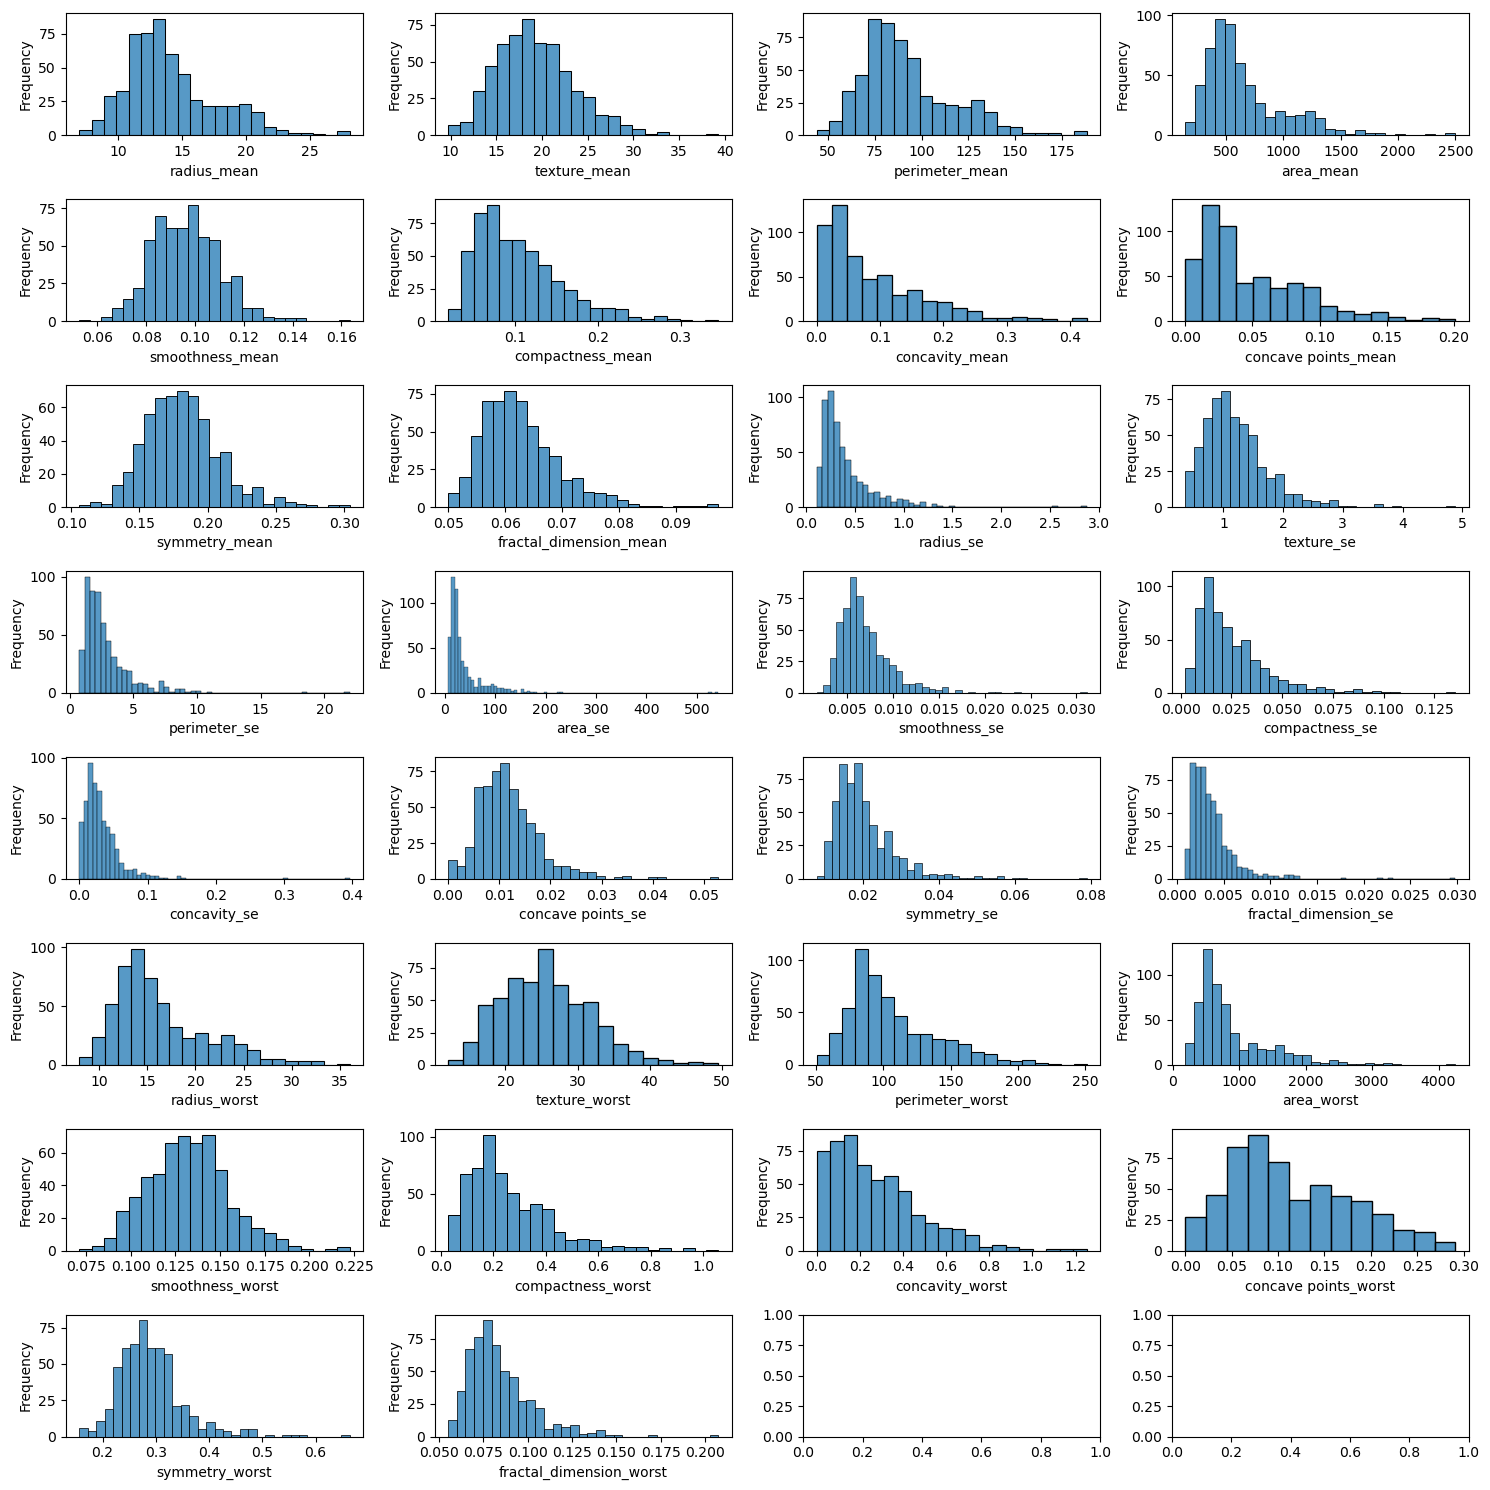

In [7]:
#| echo: false
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# drop any missing values
data = data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1)

rows = data[data.isnull().any(axis=1)]
cols= data.columns[data.isnull().any()]
    
# Create a dummy variable for the response
data['diagnosis_dummy'] = 0
data.loc[data['diagnosis'] == 'M', 'diagnosis_dummy'] = 1

# Split data in 80% train 20% test
X = data.drop(columns = ['diagnosis', 'diagnosis_dummy', 'id'])
y = data['diagnosis_dummy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

num_predictors = len(X.columns)
num_cols = 4
num_rows = math.ceil(num_predictors / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
# Flatten the axes array
axes = axes.flatten()

for i, var in enumerate(X.columns):
    ax = axes[i]
    sns.histplot(x=X[var], ax=ax)
    ax.set(xlabel=var, ylabel='Frequency')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

During the data quality check, no useful insights were obtained that would have directly contributed to the development of the model or identified the need for data cleaning/preparation.

There were no potentially incorrect values of variables that required cleaning. There was one column that was completely empty, so we dropped that column. Additionally, we dropped all observations with missing values, as there were not that many. 

We did not create any new predictors from existing predictors. 

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

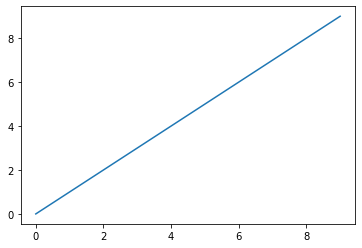

In [4]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

### Correlation Analysis
*By Luke Lilienthal*

This analysis is intended to support the interpretation of feature importances at the end of this report. With many similar predictors- say area_mean and area_worst, we expect some colinearity in out results. Indeed, we did see a shuffling of most important predictors between models.

When we group by predictor type (eg. area), we do see a correlation relationship that is consistent across all types. This relationship is shown in the heatmap below. In all, we expect for _mean and _worst attributes of predictor types to carry similar information in general.

In [ ]:
area = data[['area_mean', 'area_se', 'area_worst']]
sns.heatmap(area.corr())
plt.show()

Further, when considering correlations across types, we see strong relationships between size metrics (area, radius, perimeter). See heatmap below.

In [ ]:
drops = data.drop(columns=['area_worst', 'radius_worst', 'texture_worst', 'perimeter_worst', 'smoothness_worst', 'compactness_worst', 
                           'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis=1)
sns.heatmap(drops.corr())
plt.show()

## Approach

We used all availible models- focusing on boosting classifers due to their complexity and accuracy. Our goal for a patient-friendly model was to maximize recall. We wanted to be sure that no one would forgo care that they did need in reality as a result of an errored prediction. With recall maximized, we then focused on accuracy in order to create the most cost and care-effective diagnosis tool for medical professionals and insurance companies. 

We anticipated that unbalanced class results could skew results across members if we were not careful about random seeds. Further, we were unsure of the effects that stratifying would have. When both stratified and non-stratified results were compares, however, we did not see large differences in the metrics of interest.

There were a few solutions on Kaggle that claimed up to 99% accuracy and 100% precision. Our model build on these by considering recall as a primary optimization metric and accuracy as a secondary metric. While out model did not reach the accuracy of the previous solutions, we are able to present a different approach in terms of modeling goals that adds a dimension to the existing set of solutions.

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Decision Tree
*By Juno Park*

In [ ]:
# grid of hyperparameter values for initial search
param_grid = {    
    'max_depth': range(2,5),
    'max_leaf_nodes': range(2,14),
    'max_features': range(1, 32)
}

add screen shot of optimal hyperparameter values obtained

The results of the initial grid search made it clear that a further, more detailed search to tune the hyperparameters was unnecessary. This conclusion was reached based on the maximum values obtained for the max_depth and the max_leaf_nodes parameters from the initial decision tree model. Since my grid took into account all values up to these maximums, and the range of max_features was explored thoroughly from 1 to the total number of predictors in the dataset, I was confident in the optimality of the hyperparameter values derived from this first search. Consequently, an additional finely-tuned hyperparameter grid search was deemed superfluous.

### Bagged Trees
*By Juno Park*

In [ ]:
# grid of hyperparameter values for initial search
params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [150,200,250],
          'max_samples': [0.5, 0.75, 1.0],
          'max_features': [0.5, 0.75, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

add screen shot of optimal hyperparameter values obtained

The initial grid search yielded optimal hyperparameter values that served as a basis for further refining the hyperparameters in another round of grid search. Specifically, the n_estimators parameter, which had an optimal value of 200 in the first search, prompted a reduced range to focus on values in close proximity. Similarly, the max_samples parameter showed an optimal value of 1.0, leading to the selection of values within a narrow range around 1.0 in the subsequent search. The max_features parameter had an initial optimal value of 0.5, which dictated a narrowed range in the following search to focus on values near this midpoint. Additionally, I decided to decrease the step size between various hyperparameter values in the grid. This finer granularity would facilitate the exploration of a greater number of values within these reduced ranges.

In [ ]:
# grid of hyperparamter values for finer grid search
params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [180, 190, 200, 210, 220],
          'max_samples': [0.9, 0.95, 1.0],
          'max_features': [0.4, 0.45, 0.5, 0.65, 0.7],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

add screenshot of optimal hyperparameter values obtained

## RandomForest
*By Luke Lilienthal*

In [ ]:
#Cosrse grid search
params = {'bootstrap': [False, True],
         'max_features': [0.3, 0.5, 0.8],
          'max_depth': [12,15,18],
          'max_leaf_nodes':[1100,1200,1300]}

Optimal params:

{n_estimators=500, max_features=0.5, bootstrap=True, max_depth=12, max_leaf_nodes=1100}

Based on these results, another a few more grid searches were required with lower values of max_depth and max_leaf_nodes.

In [ ]:
#Fine grid search
params = {'bootstrap': [False, True],
         'max_features': [0.35, 0.4, 0.45],
          'max_depth': [5, 6, 7],
          'max_leaf_nodes':[500,600, 700]}

Optimal params:

{n_estimators=500, max_features=0.4, bootstrap=True, max_depth=6, max_leaf_nodes=500}

Results with threshold 0.34:
- Recall = 90.48%
- Accuracy = 94.74%

## AdaBoost
*By Luke Lilienthal*

In [ ]:
# Coarse grid search
grid['n_estimators'] = [10, 50, 100,200,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), 
                          DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4)]

Optimal params:

{DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=200}

Based on these results, another a few more grid searches were required more closely clustered values of n_estimators around 200.

In [ ]:
# Fine grid search
grid['n_estimators'] = np.arange(100, 300, 10)
grid['learning_rate'] = [1.0]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=1)]

Optimal params:

{DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=190}

Results with threshold 0.45:
- Recall = 100%
- Accuracy = 97.37%

### MARS, AdaBoost & LightGBM
*By Sankaranarayanan Balasubramanian*

### Bagged trees & Random forest
*By Fiona Fe*

### XGBoost
*By Ryu Kimiko*

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

Base models of AdaBoost, XGBoost, and Bagged DecisionTrees

With threshold 0.31:
- Recall = 95.24%
- Accuracy = 96.49%

While these results are better than most base models, they do not surpas the performance of our best individual model AdaBoost.

### Stacking ensemble

Base models of AdaBoost, XGBoost, and Bagged DecisionTrees

Best final estimator: LogisticRegression()

With threshold 0.13:
- Recall = 95.24%
- Accuracy = 96.49%

These results are the same as voting ensemble and again worse than AdaBoost. It seems that we have one dominant model in our solution set that makes ensembling not particularly effective.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Luke Lilienthal</td>
    <td>RandomForest & AdaBoost</td>
    <td>Correlation Analysis and Ensembling</td>    
    <td>Found feature colinearity and voting/stacking ensembles</td>
  </tr>
  <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>MARS, AdaBoost & LightGBM</td>
    <td>Ensembling</td>    
    <td>Stacking ensembles and voting ensemble</td>
  </tr>
    <tr>
    <td>Fiona Fe</td>
    <td>Bagged trees & Random forest</td>
    <td>Variable selection</td>    
    <td>Variable selection based on feature importance</td>
  </tr>
    <tr>
    <td>Ryu Kimiko</td>
    <td>XGBoost</td>
    <td>Ensembling</td>    
    <td>Innovative ensemble & stacking ensemble</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.